# What's the Weather Like?
####  Python requests, APIs, and JSON traversals combine to answer a fundamental question: "What's the weather like as we approach the equator?"

This project will use a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. The project will utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api) to create a representative model of weather across world cities.

Visualizations will shocase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

##### Dependencies and Setup

In [12]:
# Dependencies and Setup provided by class instructor:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities provided by class instructor:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

##### Sample of JSON data for reference:

In [14]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key
city = 'st. louis'

req = requests.get(base_url + f'&q={city}')
print()

#create a json output of the data

json_data = req.json()
print(json_data)


{'coord': {'lon': -90.1979, 'lat': 38.6273}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.02, 'feels_like': 47.03, 'temp_min': 43.07, 'temp_max': 51.94, 'pressure': 1018, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1634959351, 'sys': {'type': 1, 'id': 3689, 'country': 'US', 'sunrise': 1634905027, 'sunset': 1634944380}, 'timezone': -18000, 'id': 4407066, 'name': 'St Louis', 'cod': 200}


## Compiling the Data
### Creating a weather database for cities in above list using API calls and including a log of cities checked:

In [15]:
City_Data = {'City':[],
             'Country':[],
             'Coordinates': [],
             'Max Temperature' : [],
             'Humidity':[],
             'Pressure':[],
             'Cloudiness' : [],
             'Wind Speed': [], 
             'Date' : []}

#loop over cities and add data to dictionary
for city in cities:

    try:
        base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key   
    #q represents the city
        req = requests.get(base_url + f'&q={city}')
    
        data = req.json()
    
    #add values to our city_weather dictionary
        City_Data['City'].append(data['name'])
        City_Data['Country'].append(data['sys']['country'])
        City_Data['Coordinates'].append(data['coord'])
        City_Data['Max Temperature'].append(data['main']['temp_max'])
        City_Data['Humidity'].append(data['main']['humidity'])
        City_Data['Pressure'].append(data['main']['pressure'])
        City_Data['Cloudiness'].append(data['clouds']['all'])
        City_Data['Wind Speed'].append(data['wind']['speed'])
        City_Data['Date'].append(data['dt'])
        
        print("Processing City:" + city)
    
    except:
        print(city+ 'Not Found')
        pass

Processing City:chulym
Processing City:coolum beach
Processing City:cockburn town
Processing City:qui nhon
Processing City:sitka
Processing City:berlevag
Processing City:mataura
Processing City:kapaa
bargalNot Found
Processing City:havre-saint-pierre
Processing City:saint-philippe
Processing City:atuona
Processing City:rapu-rapu
Processing City:hermanus
Processing City:sao filipe
Processing City:rikitea
taolanaroNot Found
Processing City:ushuaia
Processing City:tilichiki
Processing City:wellington
Processing City:zhicheng
Processing City:roald
Processing City:nikolskoye
Processing City:sosnovo-ozerskoye
Processing City:verkhnevilyuysk
Processing City:kerema
Processing City:qinzhou
yeletskiyNot Found
Processing City:port blair
Processing City:arica
Processing City:yeppoon
Processing City:kvam
Processing City:hobart
Processing City:saint-francois
Processing City:vila franca do campo
Processing City:srednekolymsk
Processing City:puerto ayora
Processing City:taft
Processing City:bilibino
P

Processing City:sierra vista
Processing City:supia
Processing City:nanortalik
Processing City:pekan
Processing City:mangrol
Processing City:antigonish
Processing City:sao joao da barra
Processing City:manuk mangkaw
Processing City:miragoane
Processing City:manthani
Processing City:bontang
Processing City:belinskiy
Processing City:la grande
chagdaNot Found
grand river south eastNot Found
Processing City:sibay
Processing City:ngunguru
Processing City:veere
Processing City:egvekinot
Processing City:potiskum
Processing City:kenai
Processing City:whitehorse
Processing City:fairbanks
Processing City:sisophon
Processing City:lazaro cardenas
Processing City:saint george
Processing City:riohacha
Processing City:deputatskiy
Processing City:vigia
Processing City:esperance
Processing City:mapiripan
Processing City:borova
Processing City:cascais
Processing City:lata
Processing City:jaciara
Processing City:vardo
Processing City:san juan del parana
Processing City:daru
Processing City:agirish
Process

##### Checking Dictionary:

In [16]:
City_Data

{'City': ['Chulym',
  'Coolum Beach',
  'Cockburn Town',
  'Qui Nhon',
  'Sitka',
  'Berlevåg',
  'Mataura',
  'Kapaa',
  'Havre-St-Pierre',
  'Saint-Philippe',
  'Atuona',
  'Rapu-Rapu',
  'Hermanus',
  'São Filipe',
  'Rikitea',
  'Ushuaia',
  'Tilichiki',
  'Wellington',
  'Zhicheng',
  'Roald',
  'Nikolskoye',
  'Sosnovo-Ozerskoye',
  'Verkhnevilyuysk',
  'Kerema',
  'Qinzhou',
  'Port Blair',
  'Arica',
  'Yeppoon',
  'Kvam',
  'Hobart',
  'Saint-François',
  'Vila Franca do Campo',
  'Srednekolymsk',
  'Puerto Ayora',
  'Taft',
  'Bilibino',
  'Port Alfred',
  'Port-Gentil',
  'Bonavista',
  'Albany',
  'Saskylakh',
  'Sabla',
  'Sabang',
  'Mwingi',
  'Kamenka',
  'Rawson',
  'Castro',
  'New Norfolk',
  'Mahébourg',
  'Saint Paul Harbor',
  'Yerofey Pavlovich',
  'Punta Arenas',
  'Jamestown',
  'Vaini',
  'Avera',
  'Torbay',
  'Saint Andrews',
  'Vila',
  'Quatre Cocos',
  'Barrow',
  'Price',
  'Port Elizabeth',
  'Acaraú',
  'Biak',
  'Ḩasanābād',
  'Pizhma',
  'Meulaboh',


#### Converting Raw Data to DataFrame with desired data organization:

In [24]:
City_DataFrame = pd.DataFrame(City_Data)

# Coordinates data must be broken apart into separate data columns to isolate Latitude as a variable.
Lat_Lon = City_DataFrame['Coordinates'].to_dict()
Lat_Lon_df = pd.DataFrame(Lat_Lon)

Latitude = pd.DataFrame(Lat_Lon_df.T['lat'])
Latitude.columns = ['Latitude']
Latitude

,Latitude
0,55.0997
1,-26.5333
2,21.4612
3,13.7667
4,57.0531
...,...
576,34.9618
577,64.8945
578,-3.8881
579,-2.4177


In [25]:
# Latitude can now be added back into the rest of the data.
Weather_Data = pd.concat([City_DataFrame, Latitude], axis=1, join='inner')
Weather_Data

,City,Country,Coordinates,Max Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Date,Latitude
0,Chulym,RU,"{'lon': 80.9572, 'lat': 55.0997}",35.56,85,1017,98,21.83,1634959376,55.0997
1,Coolum Beach,AU,"{'lon': 153.1, 'lat': -26.5333}",88.34,79,1013,14,12.37,1634959376,-26.5333
2,Cockburn Town,TC,"{'lon': -71.1419, 'lat': 21.4612}",83.46,75,1016,80,19.13,1634959376,21.4612
3,Qui Nhon,VN,"{'lon': 109.2333, 'lat': 13.7667}",77.29,92,1015,100,5.86,1634959377,13.7667
4,Sitka,US,"{'lon': -135.33, 'lat': 57.0531}",46.29,71,989,90,12.66,1634959377,57.0531
...,...,...,...,...,...,...,...,...,...,...
576,Olive Branch,US,"{'lon': -89.8295, 'lat': 34.9618}",54.73,89,1018,0,1.01,1634959535,34.9618
577,Olafsvik,IS,"{'lon': -23.7142, 'lat': 64.8945}",45.90,93,989,100,8.97,1634959535,64.8945
578,Nova Olinda do Norte,BR,"{'lon': -59.0942, 'lat': -3.8881}",78.98,78,1009,99,1.92,1634959536,-3.8881
579,Amuntai,ID,"{'lon': 115.2494, 'lat': -2.4177}",89.49,60,1013,89,1.68,1634959536,-2.4177


In [26]:
# Timestamp from OpenWeather must be converted into pandas datetime to become useful.
Weather_Data['Date'] = pd.to_datetime(Weather_Data['Date'], unit='s')
Weather_Data

,City,Country,Coordinates,Max Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Date,Latitude
0,Chulym,RU,"{'lon': 80.9572, 'lat': 55.0997}",35.56,85,1017,98,21.83,2021-10-23 03:22:56,55.0997
1,Coolum Beach,AU,"{'lon': 153.1, 'lat': -26.5333}",88.34,79,1013,14,12.37,2021-10-23 03:22:56,-26.5333
2,Cockburn Town,TC,"{'lon': -71.1419, 'lat': 21.4612}",83.46,75,1016,80,19.13,2021-10-23 03:22:56,21.4612
3,Qui Nhon,VN,"{'lon': 109.2333, 'lat': 13.7667}",77.29,92,1015,100,5.86,2021-10-23 03:22:57,13.7667
4,Sitka,US,"{'lon': -135.33, 'lat': 57.0531}",46.29,71,989,90,12.66,2021-10-23 03:22:57,57.0531
...,...,...,...,...,...,...,...,...,...,...
576,Olive Branch,US,"{'lon': -89.8295, 'lat': 34.9618}",54.73,89,1018,0,1.01,2021-10-23 03:25:35,34.9618
577,Olafsvik,IS,"{'lon': -23.7142, 'lat': 64.8945}",45.90,93,989,100,8.97,2021-10-23 03:25:35,64.8945
578,Nova Olinda do Norte,BR,"{'lon': -59.0942, 'lat': -3.8881}",78.98,78,1009,99,1.92,2021-10-23 03:25:36,-3.8881
579,Amuntai,ID,"{'lon': 115.2494, 'lat': -2.4177}",89.49,60,1013,89,1.68,2021-10-23 03:25:36,-2.4177


#### Creating a CSV file of the dataframe:

In [27]:
Weather_Data.to_csv('Weather_Data.csv')

## Visualizing the Data

### Latitude vs. Temperature Plot

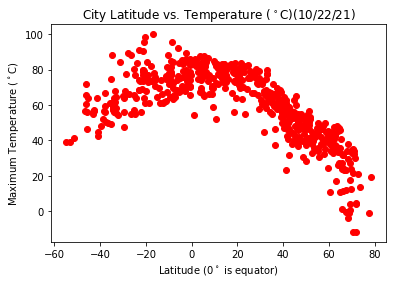

<Figure size 432x288 with 0 Axes>

In [49]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Max Temperature'], color='r', marker='o')
ax.set_ylabel("Maximum Temperature ($^\circ$C)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Temperature ($^\circ$C)(10/22/21)')
plt.show()
plt.savefig('Latitude_vs_Temperature.png', dpi = 600, facecolor = 'red')

### Latitude vs. Humidity Plot

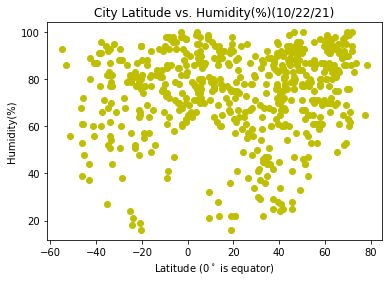

<Figure size 432x288 with 0 Axes>

In [50]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Humidity'], color='y',marker='o')
ax.set_ylabel("Humidity(%)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Humidity(%)(10/22/21)')
plt.show()
plt.savefig('Latitude_vs_Humidity.png', dpi = 600, facecolor = 'yellow')

### Latitude vs. Cloudiness Plot

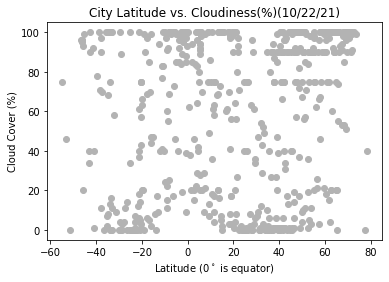

<Figure size 432x288 with 0 Axes>

In [51]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Cloudiness'], color='0.7', marker='o')
ax.set_ylabel("Cloud Cover (%)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Cloudiness(%)(10/22/21)')
plt.show()
plt.savefig('Latitude_vs_Cloudiness.png', dpi = 600, facecolor = 'black')

### Latitude vs. Wind Speed Plot

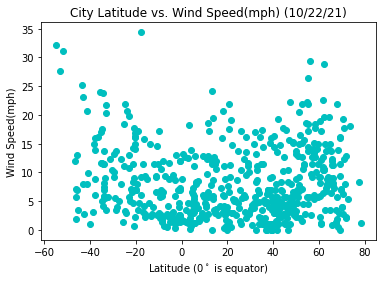

<Figure size 432x288 with 0 Axes>

In [52]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Wind Speed'], color='c', marker='o')
ax.set_ylabel("Wind Speed(mph)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Wind Speed(mph) (10/22/21)')
plt.show()
plt.savefig('Latitude_vs_Wind_Speed.png', dpi = 600, facecolor = 'blue')

# Data Organized as Small Multiples

### Weather Characteristics in Relation to Latitude

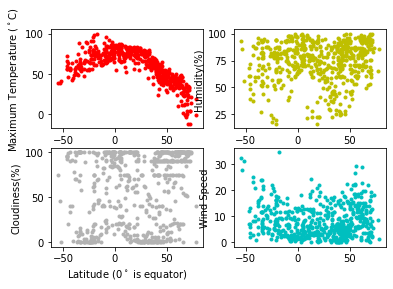

<Figure size 432x288 with 0 Axes>

In [54]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
ax[0].scatter(Weather_Data['Latitude'], Weather_Data['Max Temperature'], color='r', marker='.')
ax[1].scatter(Weather_Data['Latitude'], Weather_Data['Humidity'], color='y', marker='.')
ax[2].scatter(Weather_Data['Latitude'], Weather_Data['Cloudiness'], color='0.7', marker='.')
ax[3].scatter(Weather_Data['Latitude'], Weather_Data['Wind Speed'], color='c', marker='.')

ax[0].set_ylabel("Maximum Temperature ($^\circ$C)")
ax[1].set_ylabel('Humidity(%)')
ax[2].set_ylabel('Cloudiness(%)')
ax[3].set_ylabel('Wind Speed')
ax[2].set_xlabel("Latitude (0$^\circ$ is equator)")
plt.show()
plt.savefig('Weather_Characteristics.png', dpi = 600)

## Visualizing Data with Seaborn

### Latitude vs. Humidity Plot

### Latitude vs. Cloudiness Plot

### Latitude vs. Wind Speed Plot

# Observations

Observations can now be more easily made from the presented data.

### 1. Distance from the equator plays a significant part in local weather.
* The maximum temperature is highest just south of the equator.
* Northern cities are cooler than thier latitudinal counterparts on the other side of the equator.
* Cities near 60$^\circ$ latitude represent weather that is cool but still with high humidity.

### 2. Cloud cover is reported in fewer increments than other weather data.
* Indicated by striation in plot points

### 3. Wind speed appears to be the most evenly distributed global weather characteristic in this data set.


# DataCamp Completions